# **Car Fuel Consumption 🚗📈🔮**
## _Part I: Exploratory Data Analysis (EDA) with Python._
"_Which of two fuels is cheaper, E10 or SP 98?_"

**Dataset:** https://www.kaggle.com/datasets/anderas/car-consume/

From the Kaggle Dataset context, there are 4 questions formulated:
- **Question #1:** Which gas type consumes the most? E10 or SP98?
- **Question #2:** How much is the consume?
- **Question #3:** It consumes 0.4 liters more with E10 gas, isn't it?
- **Question #4:** Which of the two fuels is cheaper, E10 or SP 98?

These questions are going to be answered at the very end of this notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
measurements_df = pd.read_csv('../data/raw/measurements.csv', sep=',',decimal=',')
measurements_df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


#### Checking there are not duplicates

In [3]:
measurements_df.drop_duplicates(inplace=True)

#### There are not duplicates. Now reviewing the features as objetc type

In [4]:
measurements_df.columns
column_order = ['gas_type','distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas']
measurements_df = measurements_df[column_order]

In [5]:
measurements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gas_type       388 non-null    object 
 1   distance       388 non-null    float64
 2   consume        388 non-null    float64
 3   speed          388 non-null    int64  
 4   temp_inside    376 non-null    float64
 5   temp_outside   388 non-null    int64  
 6   specials       93 non-null     object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


#### What is the rate of null values per each variable?

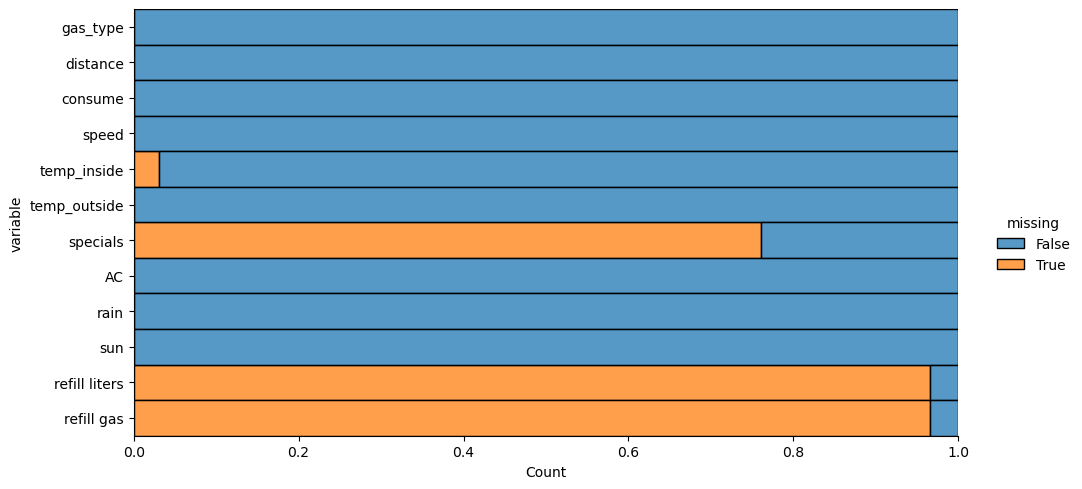

In [6]:
# Check for missing values in the DataFrame 'measurements_df'.

# melt put from wide format to long format and creates a new column named 
#'missing' containing the boolean values (True/False) indicating missing values.

measurements_df.isnull().melt(value_name='missing').pipe( 
    
# pipe the result to a lambda function that will create a seaborn distribution plot.
    
    lambda df: (
        sns.displot( # Create a distribution plot with seaborn.
            data=df,
            y='variable',
            hue='missing',     # Specify that the color encoding should be based on the 'missing' column.
            multiple='fill',   # Adjust the plot to show the proportion of each hue category.
            aspect=2           # Set the aspect ratio of the plot (width/height ratio).
        )
    )
)
plt.show()

In [7]:
# Calculates the non-missing rate as a percentage.

refill_null_rate = ((388 - 13) / 388)*100
print(round(refill_null_rate,2),'%')

96.65 %


Both refill columns have the **96.65%** of null values, so I am dropping both columns off:

In [8]:
measurements_df.drop(columns=['refill liters','refill gas'], inplace=True)

In [9]:
measurements_df.head()

,gas_type,distance,consume,speed,temp_inside,temp_outside,specials,AC,rain,sun
0,E10,28.0,5.0,26,21.5,12,NaN,0,0,0
1,E10,12.0,4.2,30,21.5,13,NaN,0,0,0
2,E10,11.2,5.5,38,21.5,15,NaN,0,0,0
3,E10,12.9,3.9,36,21.5,14,NaN,0,0,0
4,E10,18.5,4.5,46,21.5,15,NaN,0,0,0


#### Checking 'Specials' unique values:

In [10]:
measurements_df['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [11]:
# Convert the 'specials' column in the DataFrame 'measurements_df' to lowercase.

import re
measurements_df['specials'] = measurements_df['specials'].str.lower()

In [12]:
measurements_df['specials'].value_counts()

specials
rain                  32
sun                   27
ac                    14
ac rain               10
snow                   3
sun ac                 3
ac sun                 2
ac snow                1
half rain half sun     1
Name: count, dtype: int64

I am going to get a new dataframe off the 'special' column

In [13]:
weather_cond = measurements_df.loc[:, 'specials':]
weather_cond.head()

,specials,AC,rain,sun
0,NaN,0,0,0
1,NaN,0,0,0
2,NaN,0,0,0
3,NaN,0,0,0
4,NaN,0,0,0


In [14]:
weather_cond['specials'].value_counts()

specials
rain                  32
sun                   27
ac                    14
ac rain               10
snow                   3
sun ac                 3
ac sun                 2
ac snow                1
half rain half sun     1
Name: count, dtype: int64

In [15]:
# Print the sum of values in the ['AC','rain','sun'] columns of the DataFrame 'weather_cond'.

print(weather_cond['AC'].sum())
print(weather_cond['rain'].sum())
print(weather_cond['sun'].sum())

30
48
32


In [16]:
weather_cond[weather_cond['specials'] == 'half rain half sun']

,specials,AC,rain,sun
191,half rain half sun,0,1,0


In [17]:
# Replacing numbers to categorical strings

weather_cond['AC'].replace(1,'ac',inplace=True)
weather_cond['rain'].replace(1,'rain',inplace=True)
weather_cond['sun'].replace(1,'sun',inplace=True)

In [18]:
# Drop the 'specials' column
weather_cond.drop(columns='specials', inplace=True)

In [19]:
# Create the 'weather mix' column by concatenating the string representations with spaces
weather_cond['weather_mix'] = weather_cond['AC'].astype(str) + ' ' + weather_cond['rain'].astype(str) + ' ' + weather_cond['sun'].astype(str)

In [20]:
weather_cond['weather_mix'].value_counts()

weather_mix
0 0 0        295
0 rain 0      36
0 0 sun       27
ac 0 0        13
ac rain 0     12
ac 0 sun       5
Name: count, dtype: int64

In [21]:
measurements_df['AC'].value_counts()

AC
0    358
1     30
Name: count, dtype: int64

In [22]:
# Replacing the values in the 'weather mix' column
weather_cond['weather_mix'] = weather_cond['weather_mix'].replace({
    '0 0 0': 'ac OFF',
    '0 rain 0': 'rainy with ac OFF',
    '0 0 sun': 'sunny with ac OFF',
    'ac 0 0': 'ac ON',
    'ac rain 0': 'rainy with ac ON',
    'ac 0 sun': 'sunny with ac ON'
})

In [23]:
weather_cond.head()

,AC,rain,sun,weather_mix
0,0,0,0,ac OFF
1,0,0,0,ac OFF
2,0,0,0,ac OFF
3,0,0,0,ac OFF
4,0,0,0,ac OFF


In [24]:
# Drop columns
measurements_df.drop(columns=['specials','AC','rain','sun'], inplace=True)

In [25]:
# Concatenate measurements_df and weather_cond along their columns.
measurements_df = pd.concat([measurements_df, weather_cond], axis=1)

In [26]:
measurements_df.head()

,gas_type,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,weather_mix
0,E10,28.0,5.0,26,21.5,12,0,0,0,ac OFF
1,E10,12.0,4.2,30,21.5,13,0,0,0,ac OFF
2,E10,11.2,5.5,38,21.5,15,0,0,0,ac OFF
3,E10,12.9,3.9,36,21.5,14,0,0,0,ac OFF
4,E10,18.5,4.5,46,21.5,15,0,0,0,ac OFF


<Axes: xlabel='weather_mix'>

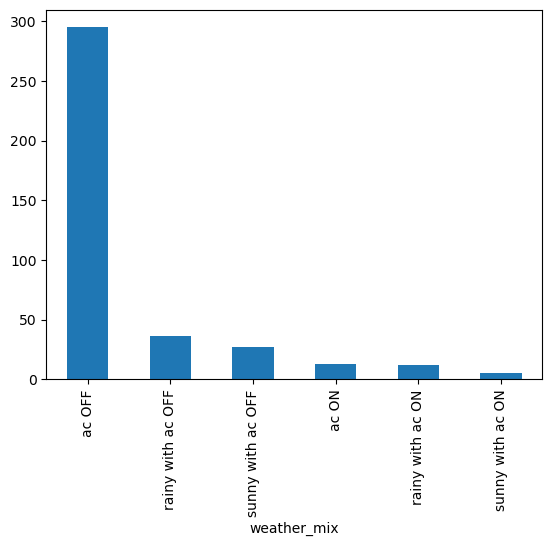

In [27]:
measurements_df.weather_mix.value_counts().plot(kind='bar')

For EDA is not relevant how **air conditioner (ac) when ON** affects the gas consumption, because is not enough data in comparison with 'ac OFF'.

At this very point I am going to start the data cleaning

### Data cleaning

#### Gas type

In [28]:
measurements_df['gas_type'].unique()

array(['E10', 'SP98'], dtype=object)

In [29]:
measurements_df['gas_type'].value_counts()

gas_type
SP98    228
E10     160
Name: count, dtype: int64

In [30]:
measurements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gas_type      388 non-null    object 
 1   distance      388 non-null    float64
 2   consume       388 non-null    float64
 3   speed         388 non-null    int64  
 4   temp_inside   376 non-null    float64
 5   temp_outside  388 non-null    int64  
 6   AC            388 non-null    object 
 7   rain          388 non-null    object 
 8   sun           388 non-null    object 
 9   weather_mix   388 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 30.4+ KB


In [31]:
# Change column temp_outside's values to floats
measurements_df['temp_outside'] = measurements_df['temp_outside'].astype(float)
measurements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gas_type      388 non-null    object 
 1   distance      388 non-null    float64
 2   consume       388 non-null    float64
 3   speed         388 non-null    int64  
 4   temp_inside   376 non-null    float64
 5   temp_outside  388 non-null    float64
 6   AC            388 non-null    object 
 7   rain          388 non-null    object 
 8   sun           388 non-null    object 
 9   weather_mix   388 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 30.4+ KB


#### Features with boolean values as follows:

In [32]:
measurements_df['AC'].unique()
# measurements_df['rain'].unique()
# measurements_df['sun'].unique()

array([0, 'ac'], dtype=object)

#### Interpolate values to fill the 12 NaN values for:

- temp_inside

In [33]:
measurements_df.interpolate(method='linear', inplace=True)

In [34]:
measurements_df.head()

,gas_type,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,weather_mix
0,E10,28.0,5.0,26,21.5,12.0,0,0,0,ac OFF
1,E10,12.0,4.2,30,21.5,13.0,0,0,0,ac OFF
2,E10,11.2,5.5,38,21.5,15.0,0,0,0,ac OFF
3,E10,12.9,3.9,36,21.5,14.0,0,0,0,ac OFF
4,E10,18.5,4.5,46,21.5,15.0,0,0,0,ac OFF


In [35]:
measurements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gas_type      388 non-null    object 
 1   distance      388 non-null    float64
 2   consume       388 non-null    float64
 3   speed         388 non-null    int64  
 4   temp_inside   388 non-null    float64
 5   temp_outside  388 non-null    float64
 6   AC            388 non-null    object 
 7   rain          388 non-null    object 
 8   sun           388 non-null    object 
 9   weather_mix   388 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 30.4+ KB


In [36]:
measurements_corr = round(measurements_df.corr(numeric_only=True), 2)

In [37]:
measurements_corr.style.background_gradient(cmap='coolwarm')

,distance,consume,speed,temp_inside,temp_outside
distance,1.000000,-0.130000,0.560000,0.080000,0.090000
consume,-0.130000,1.000000,-0.230000,-0.150000,-0.320000
speed,0.560000,-0.230000,1.000000,0.060000,0.020000
temp_inside,0.080000,-0.150000,0.060000,1.000000,0.350000
temp_outside,0.090000,-0.320000,0.020000,0.350000,1.000000


However, there is a low correlation between the variables.

In [38]:
# Creating a relational-ish table df (for the end)
measurements_df['exp_id'] = range(1, len(measurements_df) + 1)
measurements_df.insert(0, 'exp_id', measurements_df.pop('exp_id'))
measurements_df.head()

,exp_id,gas_type,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,weather_mix
0,1,E10,28.0,5.0,26,21.5,12.0,0,0,0,ac OFF
1,2,E10,12.0,4.2,30,21.5,13.0,0,0,0,ac OFF
2,3,E10,11.2,5.5,38,21.5,15.0,0,0,0,ac OFF
3,4,E10,12.9,3.9,36,21.5,14.0,0,0,0,ac OFF
4,5,E10,18.5,4.5,46,21.5,15.0,0,0,0,ac OFF


In [39]:
exp_df = measurements_df.copy()

## Feature Engineering:

I am going to merge the features **['distance','consume']** into the feature related to consumption rate per distance unit (kms)

In [40]:
measurements_df['consume_rate'] = round(measurements_df['consume'] / measurements_df['distance'],2)
measurements_df.drop(columns=['distance', 'consume'], inplace=True)

In [41]:
measurements_df.head()

,exp_id,gas_type,speed,temp_inside,temp_outside,AC,rain,sun,weather_mix,consume_rate
0,1,E10,26,21.5,12.0,0,0,0,ac OFF,0.18
1,2,E10,30,21.5,13.0,0,0,0,ac OFF,0.35
2,3,E10,38,21.5,15.0,0,0,0,ac OFF,0.49
3,4,E10,36,21.5,14.0,0,0,0,ac OFF,0.30
4,5,E10,46,21.5,15.0,0,0,0,ac OFF,0.24


#### How many variables of each data type do we have in the data set?

In [42]:
measurements_df.dtypes.value_counts()

object     5
float64    3
int64      2
Name: count, dtype: int64

#### How many variables and observations do we have in the data set?

In [43]:
measurements_df.shape # We have 388 observations and 12 variables

(388, 10)

In [44]:
round(measurements_df.describe(),2)

,exp_id,speed,temp_inside,temp_outside,consume_rate
count,388.00,388.00,388.00,388.00,388.00
mean,194.50,41.93,21.90,11.36,0.48
std,112.15,13.60,1.02,6.99,0.77
min,1.00,14.00,19.00,-5.00,0.02
25%,97.75,32.75,21.50,7.00,0.23
50%,194.50,40.50,22.00,10.00,0.32
75%,291.25,50.00,22.50,16.00,0.43
max,388.00,90.00,25.50,31.00,8.85


## Feature comparisons (numeric vs categorical) and detecting bivariate outliers

#### Consume rate vs. Gas Type

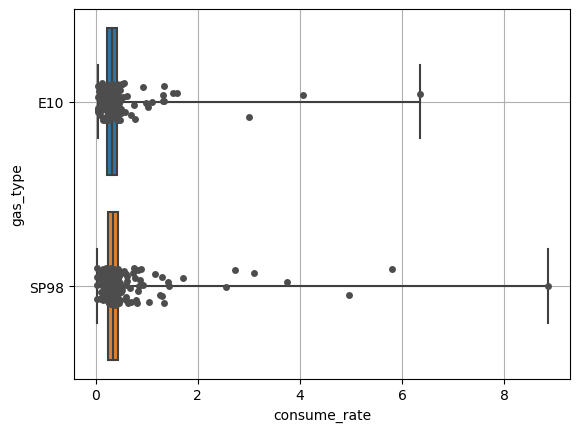

In [45]:
# Create a box plot with seaborn

ax = sns.boxplot(
    data=measurements_df,
    x='consume_rate',
    y='gas_type',    
    whis=np.inf  # Set whiskers to cover entire range of data
)

# Create a strip plot with seaborn

ax = sns.stripplot(
    data=measurements_df,
    x='consume_rate',
    y='gas_type',
    color='.3'
)
plt.grid(True) # Add grid lines to the plot
plt.show()

Despite the evident outliers, **E10** tends to consume less than **SP98**

#### Speed vs. Gas Type

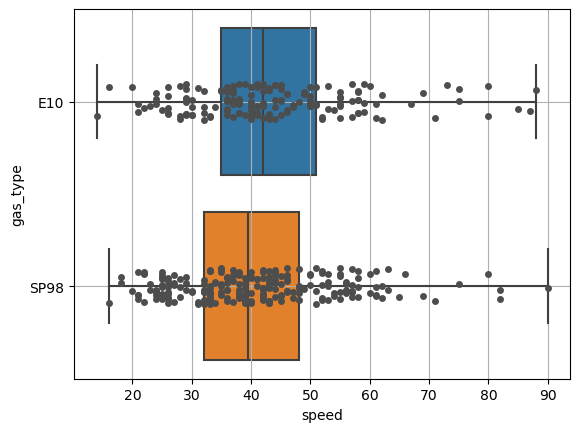

In [46]:
ax = sns.boxplot(
    data=measurements_df,
    x='speed',
    y='gas_type',    
    whis=np.inf
)

ax = sns.stripplot(
    data=measurements_df,
    x='speed',
    y='gas_type',
    color='.3'
)
plt.grid(True)
plt.show()

**E10** tends to be faster than **SP98**. By now, **E10** could be the best choice (by now)

## Detecting Multivariate outliers (scatterplot among numericals)

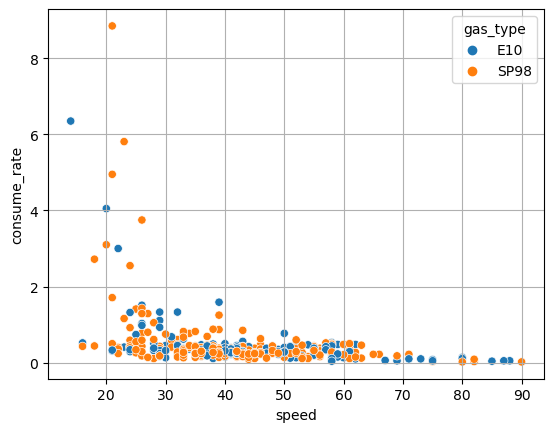

In [47]:
sns.scatterplot(x='speed', y='consume_rate', hue='gas_type', data=measurements_df)
plt.grid(True)
plt.show()

The consume rate for both gas types are more clustered **under the consume rate of 2 lts per km**

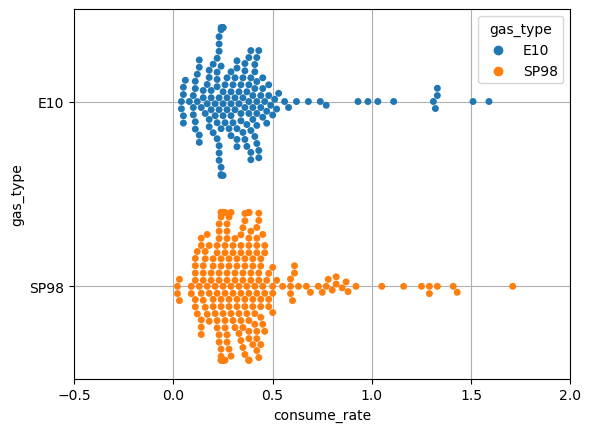

In [48]:
# Create a swarm plot with seaborn

sns.swarmplot(
    data=measurements_df,
    x='consume_rate',
    y='gas_type',
    hue='gas_type',    
)

# I can adjust the x axis (consume_rate) to get an approach
plt.xlim(-0.5, 2)
plt.grid(True)
plt.show()

#### I am going to get this analysis per Gas Type

## Data cleaning - Outliers per Gas Type

In [49]:
# Splitting the main dataframe per gas type
e10_df = measurements_df[measurements_df['gas_type'] == 'E10']
sp98_df = measurements_df[measurements_df['gas_type'] == 'SP98']

In [50]:
e10_df.head()

,exp_id,gas_type,speed,temp_inside,temp_outside,AC,rain,sun,weather_mix,consume_rate
0,1,E10,26,21.5,12.0,0,0,0,ac OFF,0.18
1,2,E10,30,21.5,13.0,0,0,0,ac OFF,0.35
2,3,E10,38,21.5,15.0,0,0,0,ac OFF,0.49
3,4,E10,36,21.5,14.0,0,0,0,ac OFF,0.30
4,5,E10,46,21.5,15.0,0,0,0,ac OFF,0.24


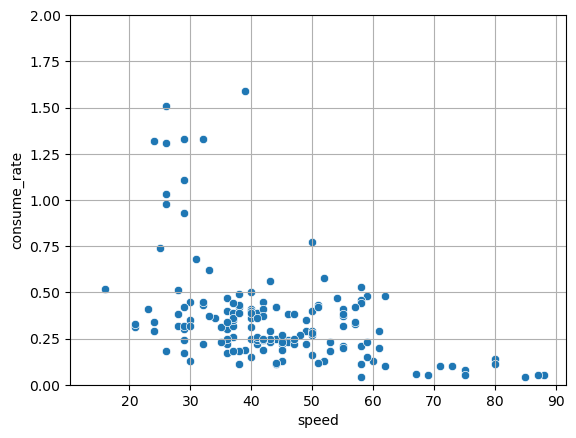

In [51]:
sns.scatterplot(x='speed', y='consume_rate', data=e10_df)
plt.ylim(0, 2) # Adjusting the y axis (consume_rate) to the value of 2.00
plt.grid(True)
plt.show()

In [52]:
sp98_df.head()

,exp_id,gas_type,speed,temp_inside,temp_outside,AC,rain,sun,weather_mix,consume_rate
44,45,SP98,32,21.5,7.0,0,0,0,ac OFF,0.61
45,46,SP98,21,21.5,4.0,0,0,0,ac OFF,4.95
46,47,SP98,32,21.5,7.0,0,0,0,ac OFF,0.36
47,48,SP98,25,21.5,8.0,0,0,0,ac OFF,0.31
48,49,SP98,25,21.5,11.0,0,0,0,ac OFF,0.42


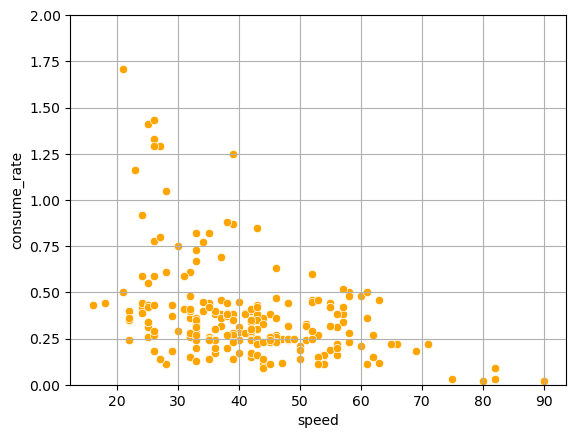

In [53]:
sns.scatterplot(x='speed', y='consume_rate', color='orange', data=sp98_df)
plt.ylim(0, 2)
plt.grid(True)
plt.show()

## Outliers Removal

 ### E10 - Consume Rate

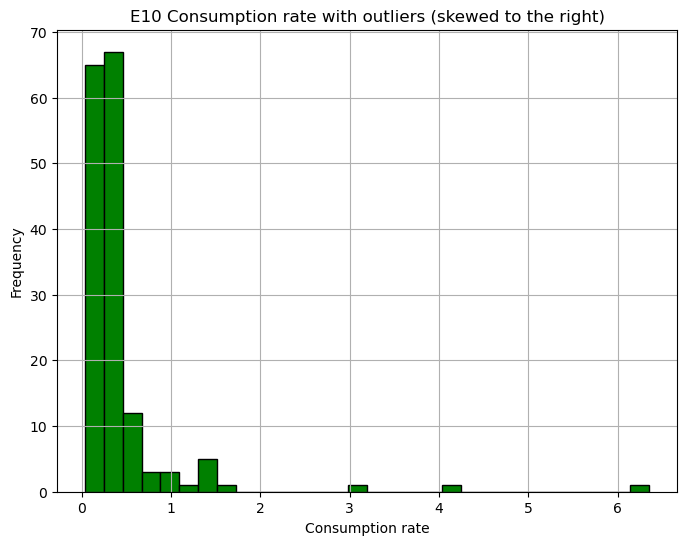

In [54]:
# Create a histogram with all the consumption rates records for E10

plt.figure(figsize=(8, 6))
plt.hist(e10_df.consume_rate, bins=30, color='green', edgecolor='black')
plt.title('E10 Consumption rate with outliers (skewed to the right)')
plt.xlabel('Consumption rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

To visualize the probability density function of the 'consume_rate', we will get a smoothed representation of its distribution with the **kernel density estimate (KDE).**

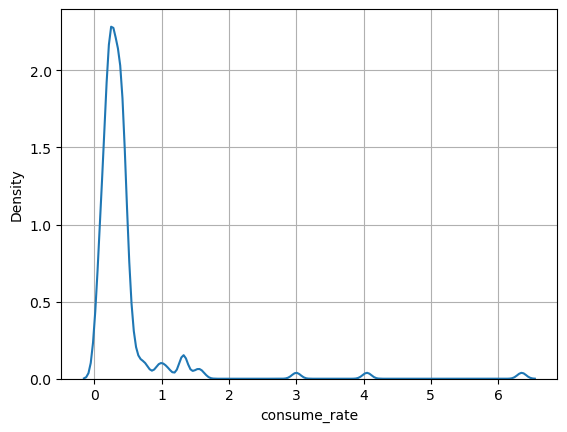

In [55]:
# Create a kernel density estimate (KDE) plot with seaborn

sns.kdeplot(data=e10_df,x='consume_rate',bw_method=0.1)
plt.grid(True)
plt.show()

In [56]:
round(e10_df.consume_rate.describe(),2)

count    160.00
mean       0.44
std        0.65
min        0.04
25%        0.22
50%        0.31
75%        0.42
max        6.35
Name: consume_rate, dtype: float64

 ### E10 - Speed

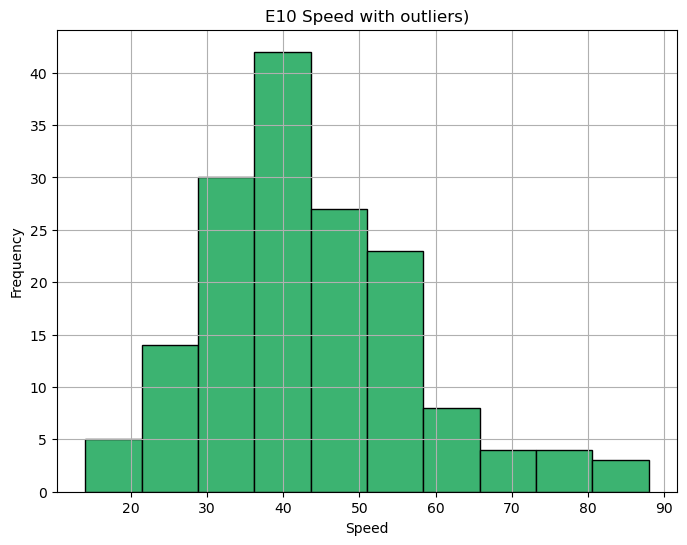

In [57]:
# Create a histogram with all the speed records for E10

plt.figure(figsize=(8, 6))
plt.hist(e10_df.speed, bins=10, color='mediumseagreen', edgecolor='black')
plt.title('E10 Speed with outliers)')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The speed for E10 shows a normal distribution to take into account for a **bivariate analysis.**

In [58]:
pc75 = e10_df['speed'].quantile(0.75)
pc25 = e10_df['speed'].quantile(0.25)
speed_iqr = pc75 - pc25
print('Interquartile range:',round(speed_iqr,2))

Interquartile range: 16.0


In [59]:
# Thresholds

# Upper threshold
upper = pc75 + (1.5 * speed_iqr)

# Lower threshold
lower = pc25 - (1.5 * speed_iqr)

print(lower,',', upper)

11.0 , 75.0


In [60]:
# Subsetting data according to chart

e10_no_outliers_df = e10_df[(e10_df['speed'] > lower ) & (e10_df['speed'] < upper)]

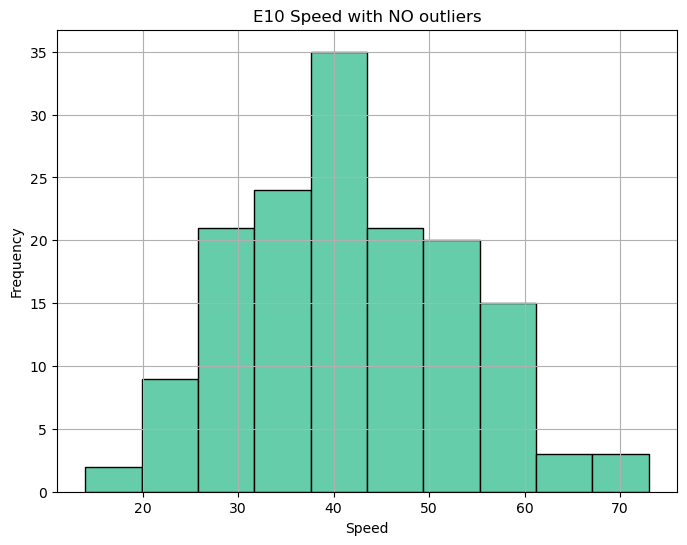

In [61]:
# Create a histogram with the speed records for E10 without outliers
plt.figure(figsize=(8, 6))
plt.hist(e10_no_outliers_df.speed, bins=10, color='mediumaquamarine', edgecolor='black')
plt.title('E10 Speed with NO outliers')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

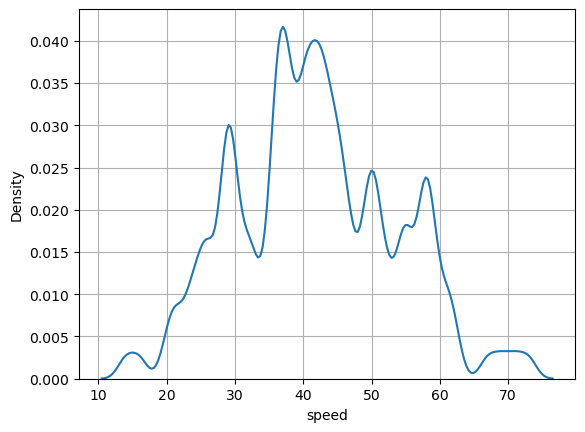

In [62]:
sns.kdeplot(data=e10_no_outliers_df,x='speed',bw_method=0.1)
plt.grid(True)
plt.show()

In [63]:
round(e10_no_outliers_df.speed.describe(),2)

count    153.00
mean      41.77
std       11.70
min       14.00
25%       34.00
50%       41.00
75%       50.00
max       73.00
Name: speed, dtype: float64

The speed mean and median are very close to each other.

### SP98 - Consume Rate

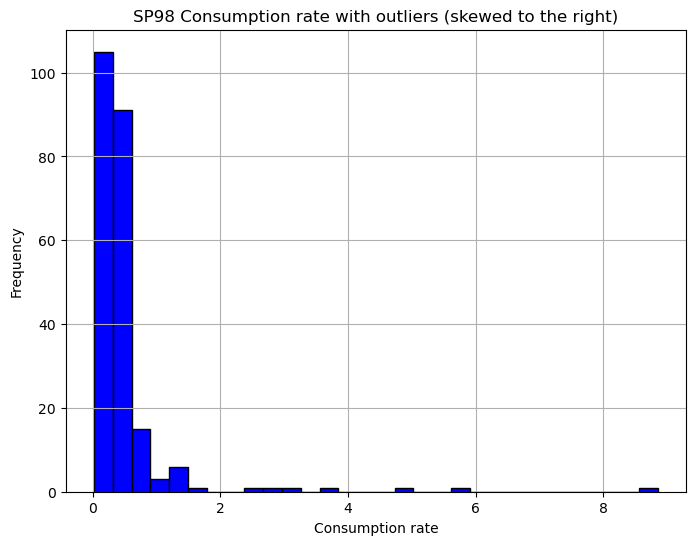

In [64]:
# Create a histogram with all the consumption rates records for SP98

plt.figure(figsize=(8, 6))
plt.hist(sp98_df.consume_rate, bins=30, color='blue', edgecolor='black')
plt.title('SP98 Consumption rate with outliers (skewed to the right)')
plt.xlabel('Consumption rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [65]:
round(sp98_df.consume_rate.describe(),2)

count    228.00
mean       0.51
std        0.85
min        0.02
25%        0.24
50%        0.34
75%        0.44
max        8.85
Name: consume_rate, dtype: float64

### SP98 - Speed

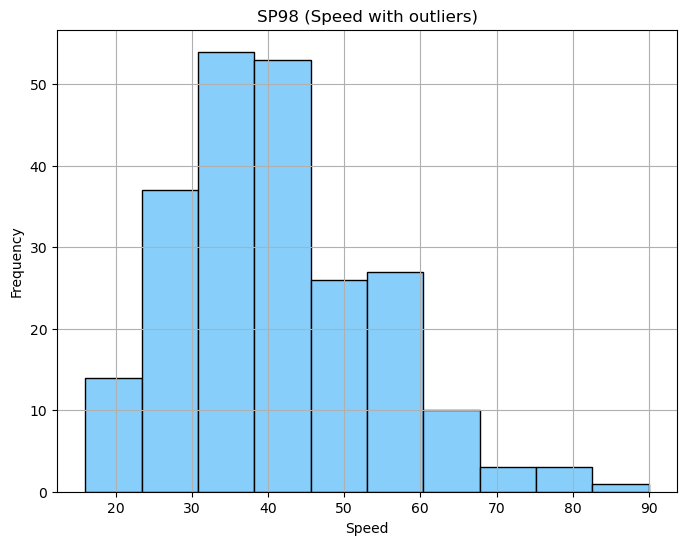

In [66]:
# Create a histogram with all the speed records for SP98
plt.figure(figsize=(8, 6))
plt.hist(sp98_df.speed, bins=10, color='lightskyblue', edgecolor='black')
plt.title('SP98 (Speed with outliers)')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The speed for SP98 is not like a big deal of a normal distribution but it could work for a **bivariate analysis.**

In [67]:
pc75 = sp98_df['speed'].quantile(0.75)
pc25 = sp98_df['speed'].quantile(0.25)
speed_iqr = pc75 - pc25
print('Interquartile range:',round(speed_iqr,2))

Interquartile range: 16.0


In [68]:
# Thresholds

# Upper threshold
upper = pc75 + (1.5 * speed_iqr)

# Lower threshold
lower = pc25 - (1.5 * speed_iqr)

print(lower,',', upper)

8.0 , 72.0


In [69]:
# Subsetting data according to chart

sp98_no_outliers_df = sp98_df[(sp98_df['speed'] > lower ) & (sp98_df['speed'] < upper)]

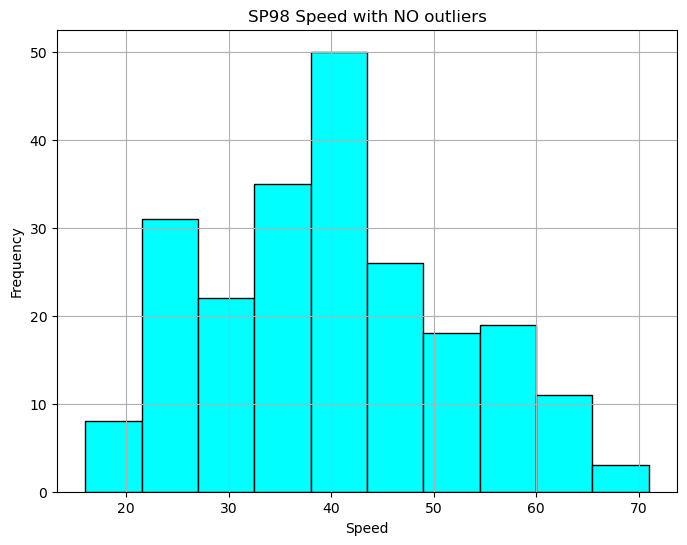

In [70]:
# Create a histogram with the speed records for SP98 without outliers
plt.figure(figsize=(8, 6))
plt.hist(sp98_no_outliers_df.speed, bins=10, color='cyan', edgecolor='black')
plt.title('SP98 Speed with NO outliers')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [71]:
sp98_no_outliers_df.speed.describe()

count    223.000000
mean      39.901345
std       11.754208
min       16.000000
25%       32.000000
50%       39.000000
75%       47.500000
max       71.000000
Name: speed, dtype: float64

The speed mean and median are **almost** close to each other.

#### Now, we can set thresholds based on speed iqr for both E10 and SP98 consume rates...

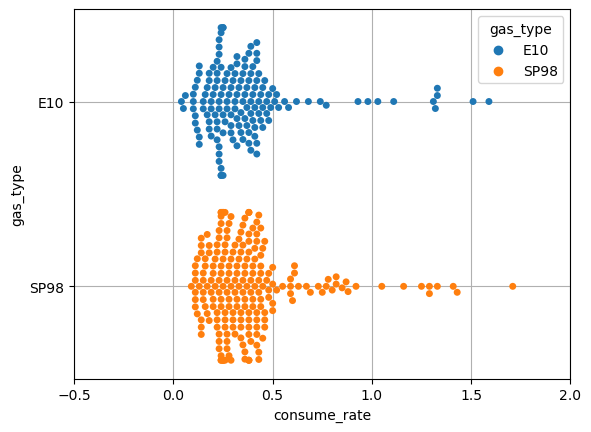

In [72]:
measurements_df = pd.concat([e10_no_outliers_df, sp98_no_outliers_df])

sns.swarmplot(
    data=measurements_df,
    x='consume_rate',
    y='gas_type',
    hue='gas_type',
    orient='h'
)

# I can adjuts the x axis (consume_rate) to get an approach
plt.xlim(-0.5, 2)
plt.grid(True)
plt.show()

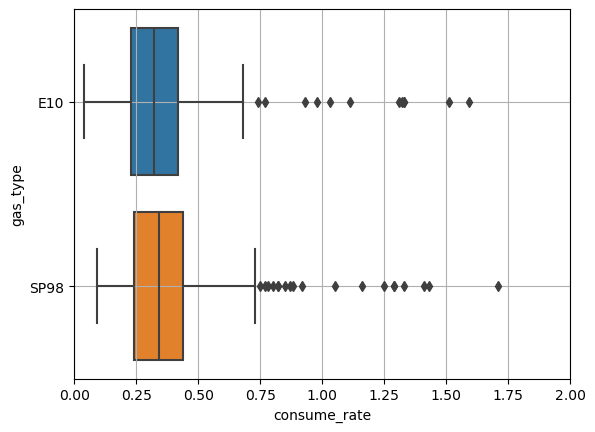

In [73]:
# Create the horizontal boxplot
sns.boxplot(
    data=measurements_df,
    x='consume_rate',
    y='gas_type',    
    orient='h'
)

# Adjust x-axis limits to "zoom in"
plt.xlim(0, 2)
plt.grid(True)
plt.show()

 ### E10 - Consume rate (Part II)

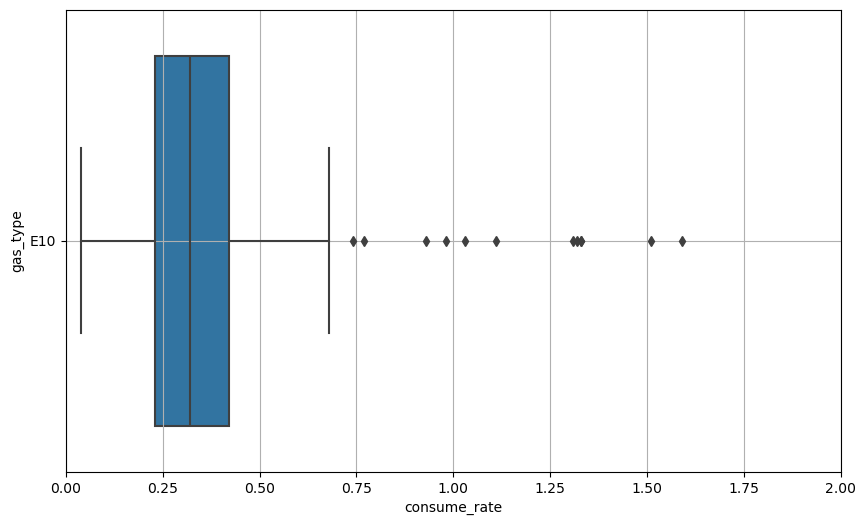

In [74]:
# Create the horizontal boxplot for e10_no_outliers_df
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=e10_no_outliers_df,
    x='consume_rate',
    y='gas_type',
    orient='h'
)
plt.xlim(0, 2)
plt.grid(True)
plt.show()

In [75]:
e10_no_outliers_df['consume_rate'].describe()

count    153.000000
mean       0.453007
std        0.660404
min        0.040000
25%        0.230000
50%        0.320000
75%        0.420000
max        6.350000
Name: consume_rate, dtype: float64

In [76]:
# Calculate the first quartile (Q1) and third quartile (Q3) of 'consume_rate' column, in a skewed distribution

Q1 = e10_no_outliers_df['consume_rate'].describe()['25%']
Q3 = e10_no_outliers_df['consume_rate'].describe()['75%']
IQR = Q3 - Q1
print(Q1, Q3)
print(IQR)

# Defining thresholds to identify outliers in a skewed distribution

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(lower, upper)

0.23 0.42
0.18999999999999997
-0.054999999999999966 0.705


In [77]:
# Subsetting data according to chart

e10_no_outliers_df = e10_no_outliers_df[(e10_no_outliers_df['consume_rate'] > lower ) & (e10_no_outliers_df['consume_rate'] < upper)]

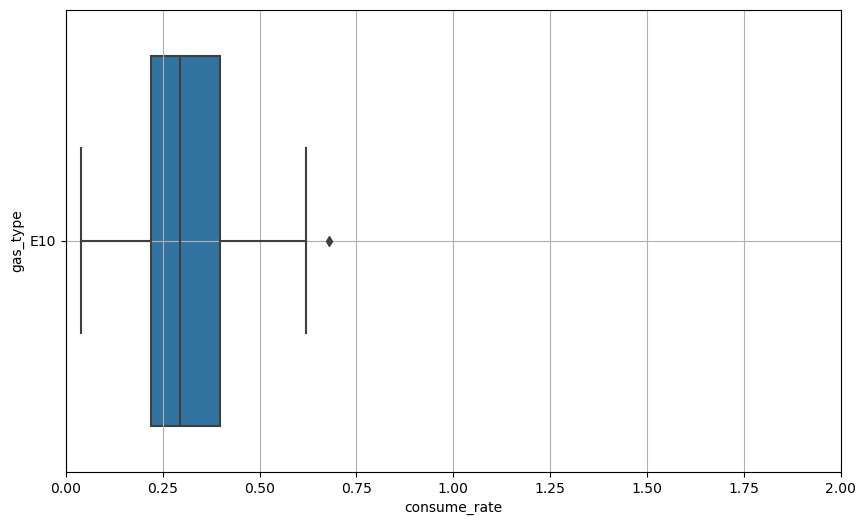

In [78]:
# Create the horizontal boxplot for e10_no_outliers_df without consumption rate outliers for E10

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=e10_no_outliers_df,
    x='consume_rate',
    y='gas_type',
    orient='h'
)
plt.xlim(0, 2)
plt.grid(True)
plt.show()

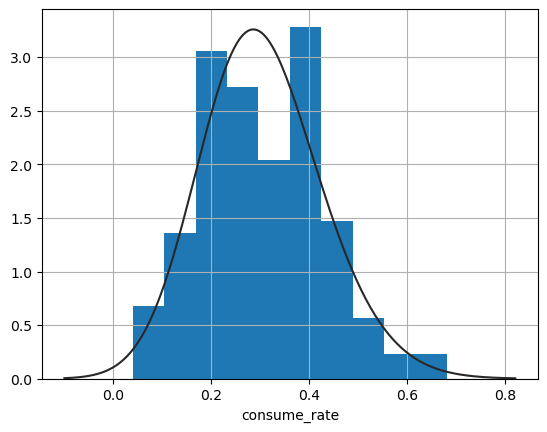

In [79]:
# https://www.youtube.com/watch?v=fJoR3QsfXa0&ab_channel=KimberlyFessel
from scipy.stats import skewnorm
e10_df = e10_no_outliers_df
sns.distplot(e10_df.consume_rate, fit=skewnorm, kde=False, hist_kws={'alpha': 1}) # Fit a skew-normal distribution to the data bars that are completely opaque due to hist_kws={'alpha': 1}
plt.grid(True)
plt.show()

 ### SP98 - Consume rate (Part II)

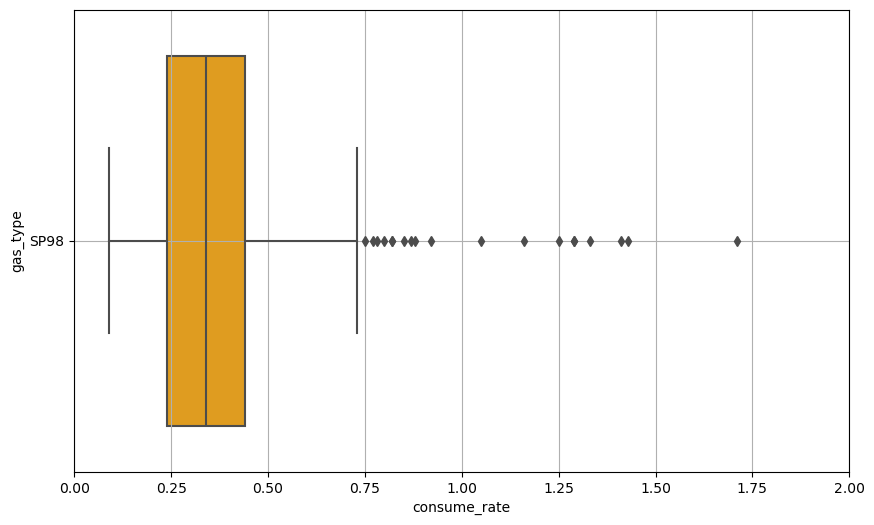

In [80]:
# Create the horizontal boxplot for sp98_no_outliers_df
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=sp98_no_outliers_df,
    x='consume_rate',
    y='gas_type',
    orient='h',
    color='orange'
)
plt.xlim(0, 2)
plt.grid(True)
plt.show()

In [81]:
sp98_no_outliers_df['consume_rate'].describe()

count    223.000000
mean       0.516726
std        0.851660
min        0.090000
25%        0.240000
50%        0.340000
75%        0.440000
max        8.850000
Name: consume_rate, dtype: float64

In [82]:
Q1 = sp98_no_outliers_df['consume_rate'].describe()['25%']
Q3 = sp98_no_outliers_df['consume_rate'].describe()['75%']
IQR = Q3 - Q1
print(Q1, Q3)
print(IQR)

# Defining thresholds to identify outliers in a skewed distribution

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(lower, upper)

0.24 0.44
0.2
-0.06000000000000005 0.74


In [83]:
# Subsetting data according to chart

sp98_no_outliers_df = sp98_no_outliers_df[(sp98_no_outliers_df['consume_rate'] > lower ) & (sp98_no_outliers_df['consume_rate'] < upper)]

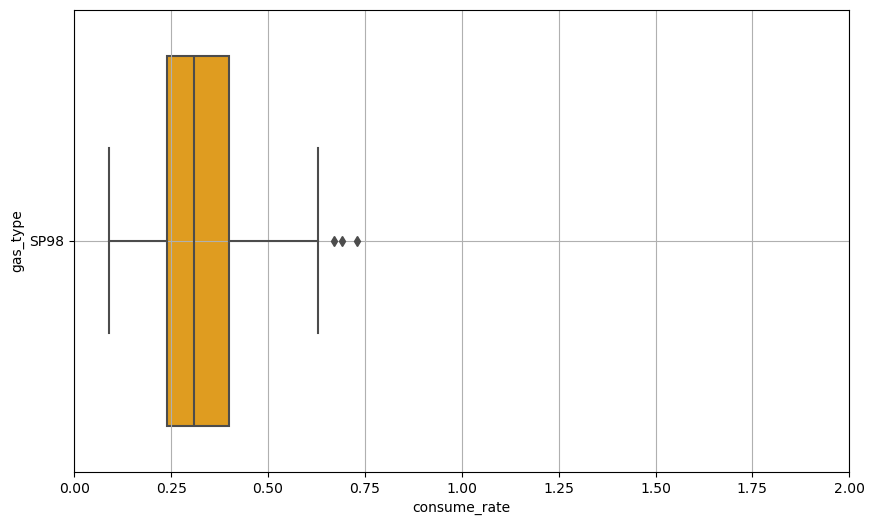

In [84]:
# Create the horizontal boxplot for sp98_no_outliers_df without consumption rate outliers for SP98
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=sp98_no_outliers_df,
    x='consume_rate',
    y='gas_type',
    orient='h',
    color='orange'
)
plt.xlim(0, 2)
plt.grid(True)
plt.show()

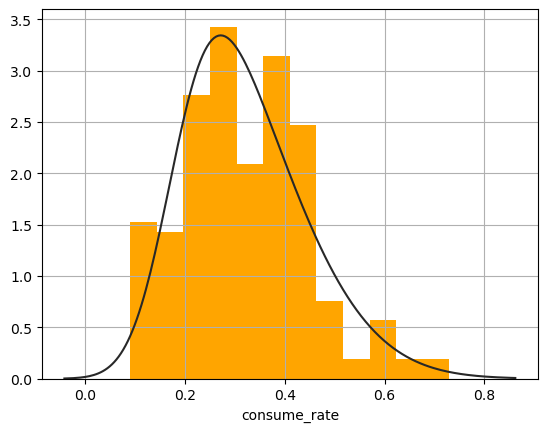

In [85]:
sp98_df = sp98_no_outliers_df
sns.distplot(sp98_df.consume_rate, color='orange', fit=skewnorm, kde=False, hist_kws={'alpha': 1})
plt.grid(True)
plt.show()

### Let's concat both df back...

In [86]:
measurements_df = pd.concat([e10_df, sp98_df])

In [87]:
measurements_df.head()

,exp_id,gas_type,speed,temp_inside,temp_outside,AC,rain,sun,weather_mix,consume_rate
0,1,E10,26,21.5,12.0,0,0,0,ac OFF,0.18
1,2,E10,30,21.5,13.0,0,0,0,ac OFF,0.35
2,3,E10,38,21.5,15.0,0,0,0,ac OFF,0.49
3,4,E10,36,21.5,14.0,0,0,0,ac OFF,0.30
4,5,E10,46,21.5,15.0,0,0,0,ac OFF,0.24


In [88]:
measurements_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   exp_id        335 non-null    int64  
 1   gas_type      335 non-null    object 
 2   speed         335 non-null    int64  
 3   temp_inside   335 non-null    float64
 4   temp_outside  335 non-null    float64
 5   AC            335 non-null    object 
 6   rain          335 non-null    object 
 7   sun           335 non-null    object 
 8   weather_mix   335 non-null    object 
 9   consume_rate  335 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 28.8+ KB


# Answering questions from our Exploratory Data Analysis...

### Question #1: Which gas type consumes the most? E10 or SP98?

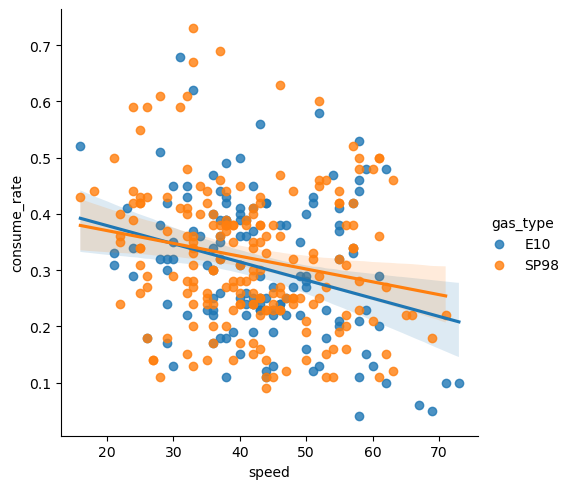

In [89]:
# Creating a scatter plot with an linear regression model fit for both gas types
sns.lmplot(
    data=measurements_df,
    x='speed',
    y='consume_rate',
    height=5, # The height of the plot
    hue='gas_type'
)


We can observe the **consume rate (liter per kms),** regarding the car speed records, is **higher** for the gas type **SP98**

### Question #2: How much is the consume?

In [90]:
# Stats Overview
measurements_df.groupby('gas_type')['consume_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
gas_type,,,,,,,,
E10,138.0,0.304058,0.125085,0.04,0.22,0.295,0.3975,0.68
SP98,197.0,0.321421,0.126652,0.09,0.24,0.310,0.4000,0.73


In [91]:
# Mean Analysis
measurements_df.groupby('gas_type')[['consume_rate', 'speed']].mean().reset_index()

,gas_type,consume_rate,speed
0,E10,0.304058,43.289855
1,SP98,0.321421,41.497462


In [92]:
# Median Analysis
measurements_df.groupby('gas_type')[['consume_rate', 'speed']].median().reset_index()

,gas_type,consume_rate,speed
0,E10,0.295,42.0
1,SP98,0.310,41.0


- **E10** has a **mean consumption rate** of 0.304 and a **median** of 0.295.
- **SP98** has a **mean consumption rate** of 0.321 and a **median** of 0.310.

Both gas types show similar patterns in terms of distribution and spread **(std)**, with **SP98 having a slightly higher average consumption rate** compared to E10.

### Question #3: It consumes 0.4 liters more with E10 gas, isn't it?

Now you are going to see the reason why I created a **relational-ish table df** very early:

In [93]:
exp_df.head()

,exp_id,gas_type,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,weather_mix
0,1,E10,28.0,5.0,26,21.5,12.0,0,0,0,ac OFF
1,2,E10,12.0,4.2,30,21.5,13.0,0,0,0,ac OFF
2,3,E10,11.2,5.5,38,21.5,15.0,0,0,0,ac OFF
3,4,E10,12.9,3.9,36,21.5,14.0,0,0,0,ac OFF
4,5,E10,18.5,4.5,46,21.5,15.0,0,0,0,ac OFF


In [94]:
# I get the id and consume columns
consume_exp_df = exp_df[['exp_id','consume']]
consume_exp_df.head()

,exp_id,consume
0,1,5.0
1,2,4.2
2,3,5.5
3,4,3.9
4,5,4.5


In [95]:
measurements_df.head()

,exp_id,gas_type,speed,temp_inside,temp_outside,AC,rain,sun,weather_mix,consume_rate
0,1,E10,26,21.5,12.0,0,0,0,ac OFF,0.18
1,2,E10,30,21.5,13.0,0,0,0,ac OFF,0.35
2,3,E10,38,21.5,15.0,0,0,0,ac OFF,0.49
3,4,E10,36,21.5,14.0,0,0,0,ac OFF,0.30
4,5,E10,46,21.5,15.0,0,0,0,ac OFF,0.24


In [96]:
# I merge just the rows of the 'consume' column, that matches with the 'exp_id' column
merged_df = pd.merge(measurements_df, consume_exp_df, on='exp_id')
merged_df.head()

,exp_id,gas_type,speed,temp_inside,temp_outside,AC,rain,sun,weather_mix,consume_rate,consume
0,1,E10,26,21.5,12.0,0,0,0,ac OFF,0.18,5.0
1,2,E10,30,21.5,13.0,0,0,0,ac OFF,0.35,4.2
2,3,E10,38,21.5,15.0,0,0,0,ac OFF,0.49,5.5
3,4,E10,36,21.5,14.0,0,0,0,ac OFF,0.30,3.9
4,5,E10,46,21.5,15.0,0,0,0,ac OFF,0.24,4.5


In [97]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   exp_id        335 non-null    int64  
 1   gas_type      335 non-null    object 
 2   speed         335 non-null    int64  
 3   temp_inside   335 non-null    float64
 4   temp_outside  335 non-null    float64
 5   AC            335 non-null    object 
 6   rain          335 non-null    object 
 7   sun           335 non-null    object 
 8   weather_mix   335 non-null    object 
 9   consume_rate  335 non-null    float64
 10  consume       335 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 28.9+ KB


In [98]:
# Mean Analysis
merged_df.groupby('gas_type')['consume'].mean().reset_index()

,gas_type,consume
0,E10,4.781159
1,SP98,4.668020


In [99]:
# Median Analysis
merged_df.groupby('gas_type')['consume'].median().reset_index()

,gas_type,consume
0,E10,4.7
1,SP98,4.6


In [100]:
# It consumes 0.4 liters more with E10 gas, isn't it?

# Consume Mean

e10_mean = 4.781159
sp98_mean = 4.668020

mean_diff = e10_mean - sp98_mean
print('mean_diff', mean_diff)

# Consume Median

e10_median = 4.7
sp98_median = 4.6

median_diff = e10_median - sp98_median
print('median_diff', median_diff)

mean_diff 0.11313899999999943
median_diff 0.10000000000000053


It consumes 0.4 liters more with E10 gas, isn't it? **The answer is Not necessarily.**

It depended on the amount of experiments per gas type. That is why I did the Feature Engineering in the first place,
to mean creating the column **'consume_rate'** to be accurate in tell **which gas type consumes the most.**

### Question #4: Which of the two fuels is cheaper, E10 or SP 98?

From the Kaggle Dataset context:
- **E10** is sold for **€ 1.38**
- **SP98** is sold for **€ 1.46**

In [101]:
e10_price = 1.38
sp98_price = 1.46

# Paid Mean

e10_paid_mean = e10_mean * e10_price
sp98_paid_mean = sp98_mean * sp98_price
print('e10_paid_mean => ',e10_paid_mean)
print('sp98_paid_mean => ',sp98_paid_mean)
print('E10 cheaper than SP 98? => ', e10_paid_mean <= sp98_paid_mean)
print('\n')

# Paid Median

e10_paid_median = e10_median * e10_price
sp98_paid_median = sp98_median * sp98_price
print('e10_paid_median => ',e10_paid_median)
print('sp98_paid_median => ',sp98_paid_median)
print('E10 cheaper than SP 98? => ', e10_paid_median <= sp98_paid_median)

e10_paid_mean =>  6.597999419999999
sp98_paid_mean =>  6.815309200000001
E10 cheaper than SP 98? =>  True


e10_paid_median =>  6.486
sp98_paid_median =>  6.715999999999999
E10 cheaper than SP 98? =>  True


From the means and medians for both gas types, **E10** tends to be **cheaper** than SP98.

## Conclusions

After this Exploratory Data analysis, **the next experiment will be Machine Learning training models for Gas Consumption predictions.** We export the 'pre-processed' dataset as follows:

In [102]:
pre_processed_gas_df = merged_df.copy()

In [103]:
from pathlib import Path
filepath = Path('../data/pre_processed/pre_processed_gas_df.csv', index=False)  
filepath.parent.mkdir(parents=True, exist_ok=True) 
pre_processed_gas_df.to_csv(filepath, index=False, encoding='utf-8')

# References
- [Detecting And Treating Outliers In Python — Part 2](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33)